In [139]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
from sklearn.tree import DecisionTreeClassifier,plot_tree, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn import tree,metrics
from sklearn.metrics import plot_roc_curve

In [140]:
#load the dataset
data=pd.read_csv('C:/Users/w/OneDrive/Documents/Second Term/CDSS/Project1/heart_failure_clinical_records_dataset.csv')

In [141]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [142]:
print("Data shape",data.shape)

Data shape (299, 13)


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [144]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [145]:
y=data.pop('DEATH_EVENT')
x=data

In [146]:
# Split the dataset into training and testing sets
# x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.6,test_size=0.4,random_state=100)

In [147]:
## Initialize a decision tree classifier model
DT=DecisionTreeClassifier(criterion="entropy",random_state=42)

In [148]:
DT.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [149]:
# Make predictions on the testing data
y_predict=DT.predict(x_test)
print(y_predict)

[0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 1 0]


In [150]:
params = {
    "max_depth": [2,3,4,5,7,9,10,12,15,17,20],
    "min_samples_leaf": [1,2,3,4,5,7,8,9,10,20,50,100,500]
}

In [151]:
grid_search = GridSearchCV(estimator=DT,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [152]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 143 candidates, totalling 715 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 7, 9, 10, 12, 15, 17, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 7, 8, 9, 10, 20,
                                              50, 100, 500]},
             scoring='accuracy', verbose=1)

In [153]:
grid_search.best_score_

0.8215873015873016

In [154]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=20,
                       random_state=42)

## Model Performance

In [155]:
training_accuracy=accuracy_score(y_train, dt_best.predict(x_train))
training_accuracy

0.8379888268156425

In [164]:
#accuracy=(True Positive+True Negative)/(True Positive+ True Negative+ False Positive+ False Negative)
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.8333333333333334

In [157]:
# Precision=(True Positive)/(True Positive + True Negative)
precision = precision_score(y_test, y_predict)
precision

0.75

In [158]:
# Recall=(True Positive)/(True Positive+False Negative) 
recall = recall_score(y_test, y_predict)
recall

0.7105263157894737

In [159]:
# Harmonic mean of precision and recall 
f1 = f1_score(y_test, y_predict)
f1

0.7297297297297298

## Plot Decision Tree


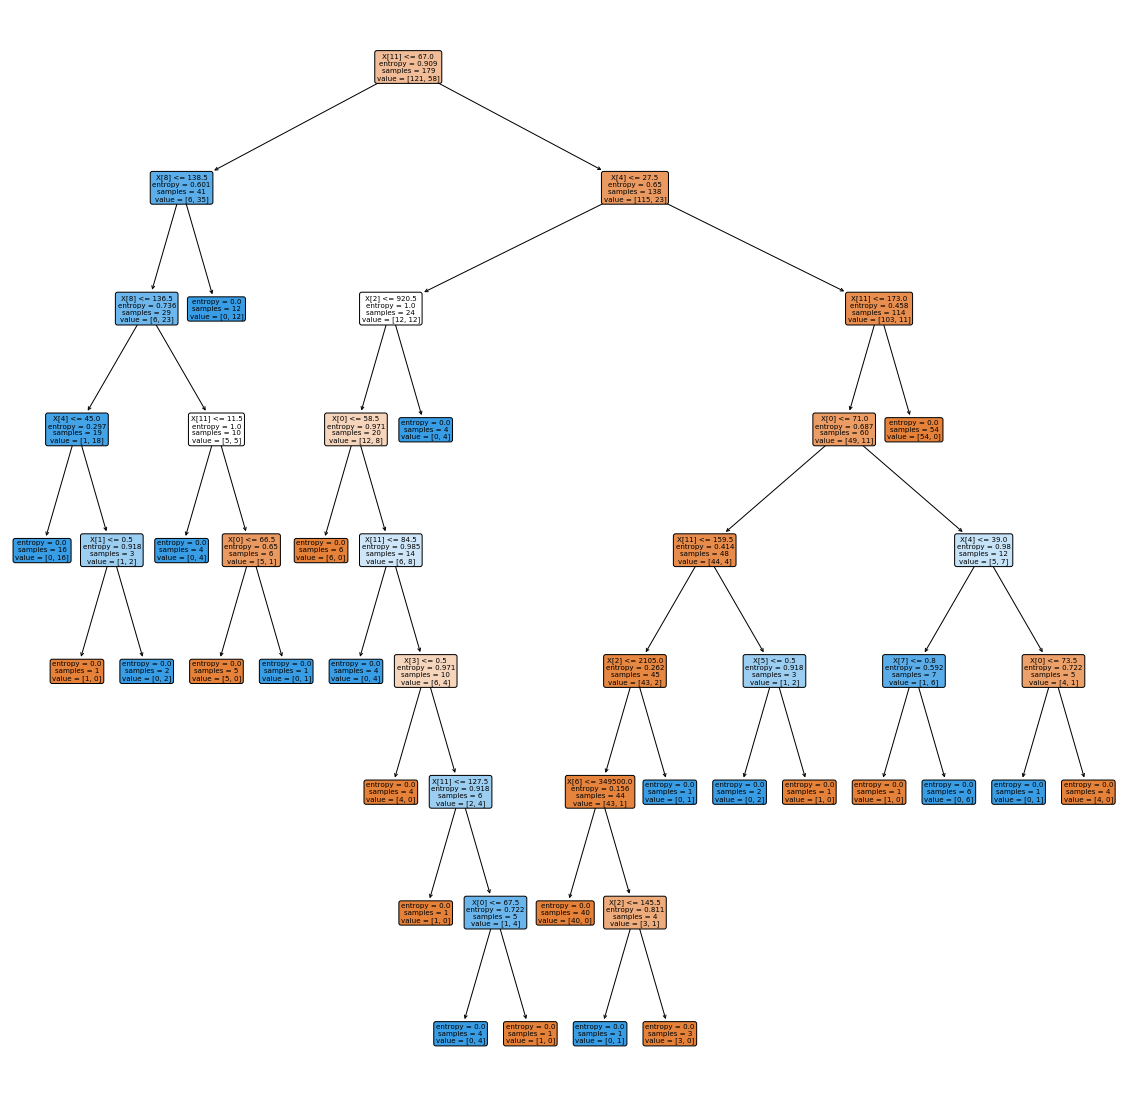

In [160]:
plt.figure(figsize=(20, 20))
plot_tree(DT, filled=True, rounded=True)
plt.show()

## Confusion Metrics 

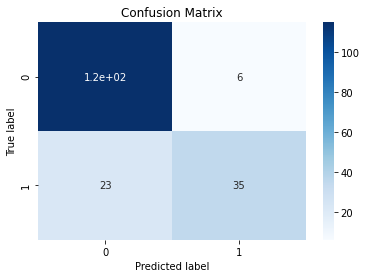

In [163]:
cm_train=metrics.confusion_matrix(y_train, dt_best.predict(x_train))
sns.heatmap(cm_train, annot=True, cmap='Blues')

# Add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

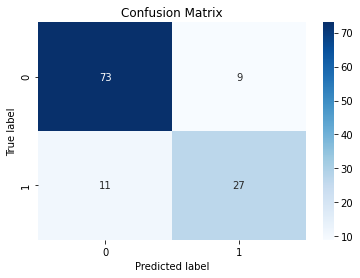

In [162]:
cm_test=metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(cm_test, annot=True, cmap='Blues')

# Add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()